#### Densest Subgraph Problem

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def plot_graph(E, fig_size=5):
    # Create a new graph
    G = nx.Graph()

    # Add edges to the graph
    for (u, v) in E:
        G.add_edge(u, v)

    # Draw the graph
    plt.figure(figsize=(fig_size, fig_size))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True)
    plt.show()

#### Greedy Peeling (Approximate Algorithm)

In [97]:
class Vertex:
    def __init__(self, id):
        self.id = id
        self.adjacency_list = []
        self.removed = False
        self.degree = 0
        self.degree_list_pointer = None
        self.vertex_list_pointer = None
        self.next = None
        self.prev = None

    def __str__(self):
        return str(self.id)

    def __repr__(self):
        return str(self.id)


class Edge:
    def __init__(self, id, u, v):
        self.id = id
        self.u = u
        self.v = v

    def __str__(self):
        return str((self.u, self.v))

    def __repr__(self):
        return str((self.u, self.v))


# doubly linked list
class LL:
    # linked list of vertices
    def __init__(self):
        self.head = None
        self.tail = None
        self.size = 0

    def add(self, vertex):
        vertex.next = None
        if self.head is None:
            self.head = vertex
            self.tail = vertex
        else:
            self.tail.next = vertex
            vertex.prev = self.tail
            self.tail = vertex
        self.size += 1

    def pop(self):
        if self.head is None:
            return None
        else:
            vertex = self.head
            if vertex.next is not None:
                vertex.next.prev = None
                self.head = vertex.next
            else:
                self.head = None
                self.tail = None
            self.size -= 1
            return vertex

    def remove(self, vertex):
        if vertex.prev is not None:
            vertex.prev.next = vertex.next
        else:
            self.head = vertex.next
            if self.head is not None:
                self.head.prev = None

        if vertex.next is not None:
            vertex.next.prev = vertex.prev
        else:
            self.tail = vertex.prev
            if self.tail is not None:
                self.tail.next = None

        vertex.prev = None
        vertex.next = None
        self.size -= 1

    def __str__(self):
        vlist = []
        if self.head is not None:
            v = self.head
            #v_prev_id = None 
            while v is not None:
                print(f"Current vertex id: {v.id}")  # Debugging line
                vlist.append(v.id)
                #v_prev_id = v.id
                v = v.next
                #if v is not None:
                    #if v_prev_id == v.id:
                    #    print(f"Loop detected at vertex {v.id}")
                    #    break
        return str(vlist)        


# implementation of greedy peeling algorithm for finding densest subgraph
def greedy_peeling(G, verbose=False):
    V, E = G

    # create adjacency list 
    vertex_list = [Vertex(v) for v in V]
    for (u,v) in E:
        vertex_list[u].adjacency_list.append(vertex_list[v])
        vertex_list[v].adjacency_list.append(vertex_list[u])    

    # create array of size |V| to store linked lists containing vertices at each possible degree, keep track of smallest degree
    degree = [LL() for _ in range(len(V))]
    min_degree = len(V)
    for v in vertex_list:
        d = len(v.adjacency_list) # degree of vertex v
        v.degree = d
        v_degree_object = Vertex(v.id)
        v_degree_object.vertex_list_pointer = v
        v.degree_list_pointer = v_degree_object
        degree[d].add(v_degree_object)
        min_degree = min(min_degree, d)

    def print_vertices():
        print("\nVertices:\n")
        for v in vertex_list:
            if v is not None:
                print(f"{v.id}: {v.adjacency_list}")

        print("\nDegrees:\n")
        for i in range(len(degree)):
            if degree[i].size > 0:
                print(f"{i}: {degree[i]}")    

        print(f"Min degree: {min_degree}\n")            

    if verbose:
        print_vertices()

    # peeling iterations
    S = V.copy()
    S_max = V.copy()
    num_vertices = len(V)
    num_edges = len(E)
    max_density = num_edges / num_vertices

    iters = 0
    while len(S) > 0 and min_degree < len(V):
        iters += 1
        if degree[min_degree].size == 0:
            min_degree += 1
            continue

        # get min degree vertex
        v_degree = degree[min_degree].pop()
        # use pointer to get vertex list object
        v = v_degree.vertex_list_pointer
        # mark the vertex list object as removed and zero out it's degree
        v.removed = True
        v.degree_list_pointer = None
        v.degree = 0
        #print(f"Removed vertex {v.id} with degree {min_degree}")
        
        # update the degree of neighbors
        for w in v.adjacency_list:
            if not w.removed:
                #print(f"Updating degree of vertex {w.id} from {w.degree} to {w.degree-1}")
                # current degree of w
                d = w.degree 
                # new degree of w
                w.degree -= 1    
                # use pointer to jump to the correct linked list in degree array
                w_degree = w.degree_list_pointer
                # remove w_degree from current linked list
                degree[d].remove(w_degree)
                # add w_degree to degree d-1 linked list     
                degree[d-1].add(w_degree)
                
        # empty out adjacency list of v
        v.adjacency_list = []

        # update S
        S.remove(v.id)
        # update density
        num_vertices -= 1
        num_edges -= min_degree
        density = num_edges / num_vertices
        if density > max_density:
            max_density = density
            S_max = S.copy()

        if verbose:
            print(f"Removed vertex {v.id} with degree {min_degree}")
            print(f"New density: {density}")
            print(f"Remaining vertices: {S}")
            print("\nDegrees:\n")
            for i in range(len(degree)):
                if degree[i]:
                    print(f"{i}: {degree[i]}")  

    
    print(f"Max density: {max_density}")
    print(f"Densest subgraph vertices: {S_max}")



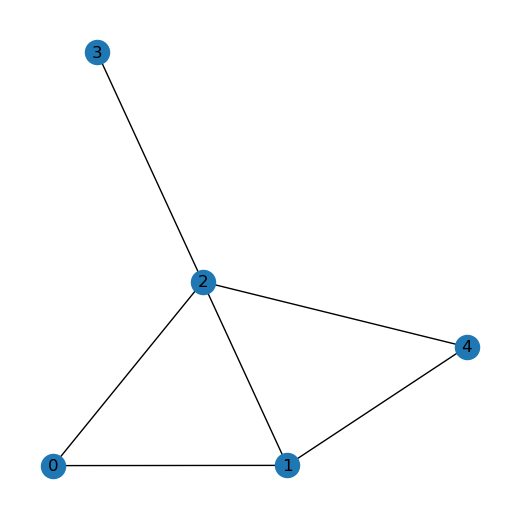

In [98]:
random.seed(0)

# example graph

# create a random undirected connected graph with vertex size N
"""
N = 6
V = list(range(N))
E = []
for i in range(N):
    for j in range(i+1, N):
        if random.random() < 0.5:
            E.append((i,j))
G = (V,E)
"""

V = [0,1,2,3,4,5]
E = [(0,1), (0,2), (1,2), (2,3), (1,4), (2,4)]
G = (V,E)

# plot the graph
plot_graph(E, fig_size=5)

In [99]:
# test greedy peeling algorithm
greedy_peeling(G, verbose=False)

Max density: 1.25
Densest subgraph vertices: [0, 1, 2, 4]


#### Max-Flow Based Densest Subgraph (Exact Algorithm)